In [45]:
import pandas as pd
import matplotlib.pyplot as plt

print([style for style in plt.style.available])
plt.style.use('seaborn-white')


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Block A: Data cleaning & merging

### Users - EDA

In [2]:
users_df=pd.read_csv("SIQ_data_test/users.csv")

In [3]:
print(users_df.shape)
users_df.head()

(5807, 5)


,UserId,Country,DOB,Gender,RegDate
0,1326865,DE,1988-05-04,M,2016-03-24
1,1333278,GB,1971-07-21,M,2016-02-09
2,1336967,GB,1983-07-31,M,2016-01-29
3,1339784,Other,1976-09-21,M,2016-01-21
4,1339829,Other,1981-05-03,F,2016-04-12


Reload with setting some types

In [4]:
users_df=pd.read_csv("SIQ_data_test/users.csv", dtype={'UserId':str, 'Country':str, 'Gender':str}, parse_dates=['DOB','RegDate'])

Sometimes opt for using profiling tools for initial look at data. In this case just look manually at the columns.

#### User Id

In [5]:
print( f"{users_df.UserId.isna().sum():,} missing values for UserId")
print( f"{users_df.UserId.nunique():,} unique values for UserId")
print( f"{users_df.UserId.duplicated().sum():,} duplicate values for UserId")

0 missing values for UserId
5,807 unique values for UserId
0 duplicate values for UserId


#### Country

In [6]:
print( f"{users_df.Country.isna().sum():,} missing values for Country")
print( f"{users_df.Country.nunique():,} unique values for Country")

0 missing values for Country
5 unique values for Country


In [7]:
display(users_df.Country.value_counts(dropna=False))

GB       2489
US       1017
DE        945
Other     889
FR        467
Name: Country, dtype: int64

#### Gender

In [8]:
print( f"{users_df.Gender.isna().sum():,} missing values for Gender")
print( f"{users_df.Gender.nunique():,} unique values for Gender")

0 missing values for Gender
3 unique values for Gender


In [9]:
display(users_df.Gender.value_counts(dropna=False))

M    2909
     1481
F    1417
Name: Gender, dtype: int64

In [10]:
print(f"{(users_df.Gender==' ').sum():,} rows are missing Gender value.")

1,481 rows are missing Gender value.


## Question 1

Please load the users and activity tables into Python.
 - a.	How many variables are in the datasets?
      - There are 5 variables in this data set. `UserId`, `Country`, `DOB`, `Gender`, and `RegDate`
 - b.	How many observations are in the datasets?
      - There are 5,807 observations in this data set. 


## Question 2

As there are no duplicate UserIds in the dataset, assume that 1 row = 1 user.

* a: There are 2,909 Male users in the dataset.
* b: There are 1,417 Female users in the dataset.
* c: There are 1,481 users missing a value in the dataset.

Assume all missing / ' ' values are M. Correct the column for future analysis.

In [11]:
users_df['Gender_corrected'] = users_df.Gender.apply(lambda s: 'M' if s == ' ' else s)
users_df.Gender_corrected.value_counts()

M    4390
F    1417
Name: Gender_corrected, dtype: int64

#### RegDate

In [12]:
print("Red Date (Min - Max):", users_df.RegDate.min(),users_df.RegDate.max())

Red Date (Min - Max): 2015-11-26 00:00:00 2017-05-10 00:00:00


<AxesSubplot:title={'center':'Histogram of RegDate values by Year'}, xlabel='RegDate'>

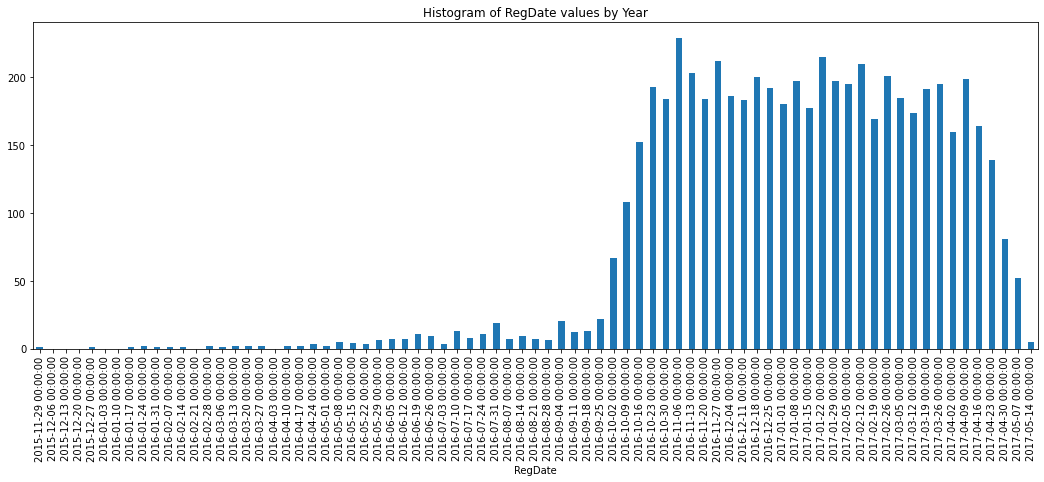

In [13]:
users_df.groupby(pd.Grouper(key='RegDate', freq='W')).size().plot.bar(figsize=(18,6), title='Histogram of RegDate values by Year')

Bulk of RegDate in period 2016-10-02 to 2017-05-07. 

#### DOB

In [14]:
print("Red Date (Min - Max):", users_df.DOB.min(),users_df.DOB.max())


Red Date (Min - Max): 1900-08-05 00:00:00 1999-01-23 00:00:00


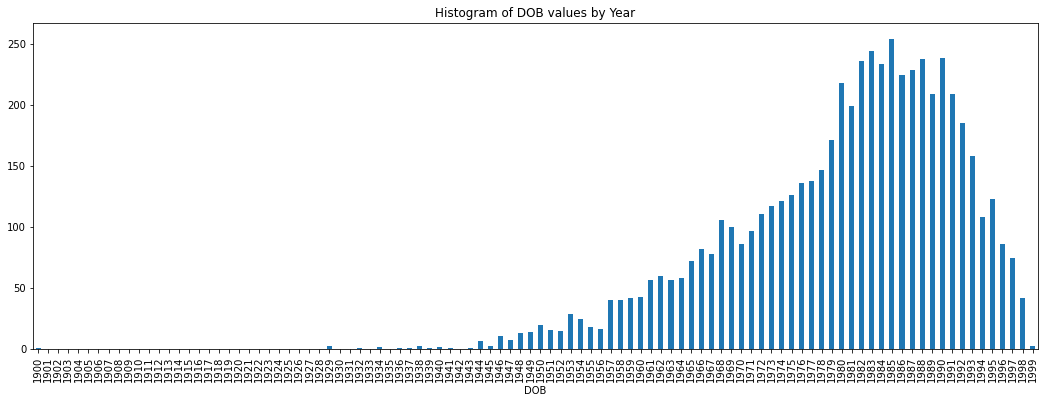

In [15]:
dob_by_year = users_df.groupby(pd.Grouper(key='DOB', freq='Y')).size().rename('count')
dob_by_year.index = dob_by_year.index.year
dob_by_year.sort_index().plot.bar(figsize=(18,6),title='Histogram of DOB values by Year');


### Activities

In [16]:
activ_df=pd.read_csv("SIQ_data_test/activities.csv")
print(activ_df.shape)
activ_df.head()

(22642, 3)


,UserId,Date,Revenue
0,1326865,2017-02-19,17.05
1,1326865,2017-02-28,17.05
2,1326865,2017-03-06,17.16
3,1326865,2017-03-07,17.16
4,1326865,2017-03-08,17.16


Reload with setting some types

In [17]:
activ_df=pd.read_csv("SIQ_data_test/activities.csv", dtype={'UserId':str, 'Revenue':float}, parse_dates=['Date'])

#### UserId

In [18]:
print( f"{activ_df.UserId.isna().sum():,} missing values for UserId")
print( f"{activ_df.UserId.nunique():,} unique values for UserId")
print( f"{activ_df.UserId.duplicated().sum():,} duplicate values for UserId")

0 missing values for UserId
5,797 unique values for UserId
16,845 duplicate values for UserId


So mulitple activities per user.

Cross check how many UserIds match UserIds in User data.

In [19]:
print(f"{len(set(users_df.UserId) & set(activ_df.UserId)):,} UserId in both Users and Activities.")
print(f"{len(set(users_df.UserId) - set(activ_df.UserId)):,} UserId in Users but not Activities.")
print(f"{len(set(activ_df.UserId) - set(users_df.UserId)):,} UserId in Activities but not Users.")


5,797 UserId in both Users and Activities.
10 UserId in Users but not Activities.
0 UserId in Activities but not Users.


So 10 users have no activities, be prepared in joining.

#### Date

In [20]:
print("Red Date (Min - Max):", activ_df.Date.min(),activ_df.Date.max())


Red Date (Min - Max): 2016-09-24 00:00:00 2017-10-01 00:00:00


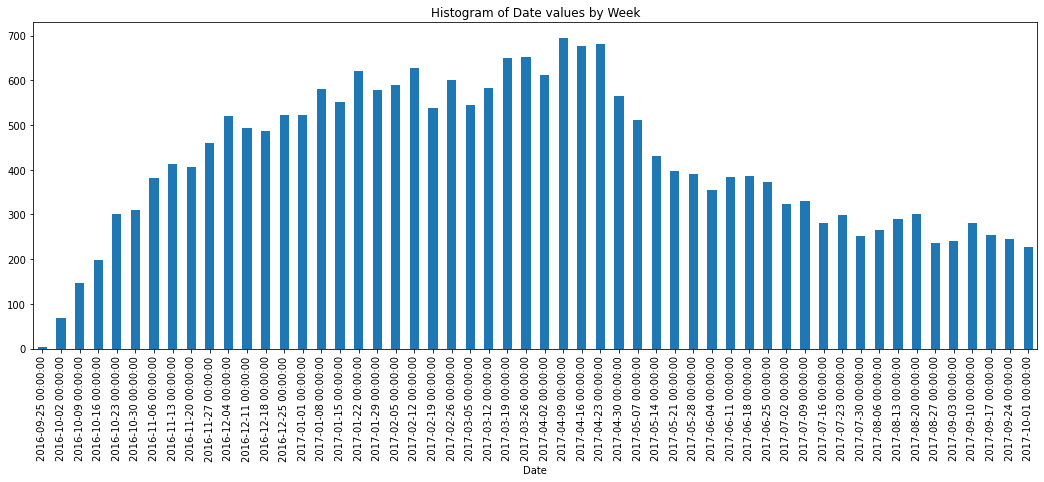

In [21]:
date_by_week = activ_df.groupby(pd.Grouper(key='Date', freq='W')).size().rename('count')
date_by_week.sort_index().plot.bar(figsize=(18,6),title='Histogram of Date values by Week');


#### Revenue

In [22]:
print( f"{activ_df.Revenue.isna().sum():,} missing values for Revenue")
print( f"Mean value = {activ_df.Revenue.mean():.1f}, Max = {activ_df.Revenue.max():.1f}, Min = {activ_df.Revenue.min():.1f}")
print( f"Median value = {activ_df.Revenue.median():.1f}")

0 missing values for Revenue
Mean value = 131.3, Max = 19000.0, Min = 11.0
Median value = 40.0


Text(0, 0.5, 'Count')

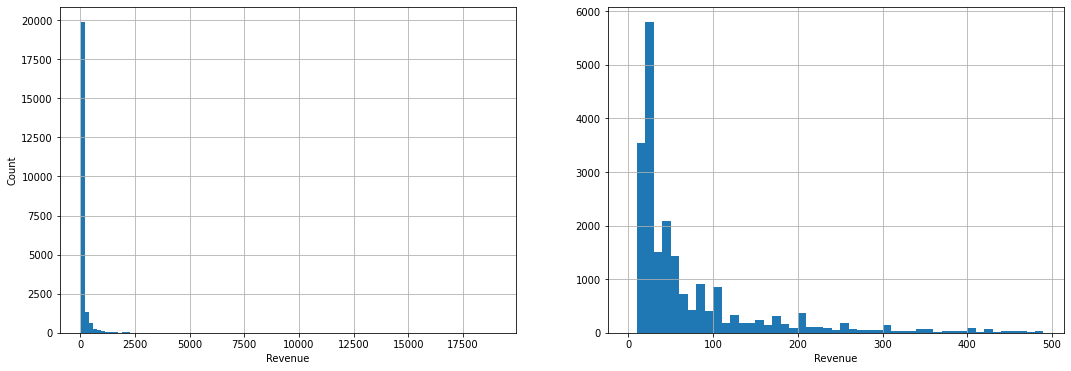

In [23]:
fig,ax = plt.subplots(1,2,figsize=(18,6))
activ_df.Revenue.hist(bins=100,ax=ax[0]); ax[0].set_xlabel('Revenue'); ax[0].set_ylabel('Count')
activ_df.Revenue.hist(bins=range(0,500,10),ax=ax[1]); ax[1].set_xlabel('Revenue'); ax[0].set_ylabel('Count')

Looks like the value if 19000 is an outlier, most values < 500. Have a look at that distribution.

In [24]:
display(activ_df.Revenue.quantile([0.25,0.5,0.75,0.95]))

0.25     20.000
0.50     40.000
0.75    100.000
0.95    469.834
Name: Revenue, dtype: float64

In [25]:
display(pd.cut(activ_df.Revenue, bins=[0,500,1000,10000,20000]).value_counts())

(0, 500]          21666
(500, 1000]         602
(1000, 10000]       364
(10000, 20000]       10
Name: Revenue, dtype: int64

## Question 3

Merge the two datasets and calculate the days since registration for each activity. What is the total mean and median revenue generated per user (ie across all activities)? How do you interpret the result?

In [26]:
df = activ_df.merge(users_df, on='UserId', how='left')
print(df.shape)
df.head()

(22642, 8)


,UserId,Date,Revenue,Country,DOB,Gender,RegDate,Gender_corrected
0,1326865,2017-02-19,17.05,DE,1988-05-04,M,2016-03-24,M
1,1326865,2017-02-28,17.05,DE,1988-05-04,M,2016-03-24,M
2,1326865,2017-03-06,17.16,DE,1988-05-04,M,2016-03-24,M
3,1326865,2017-03-07,17.16,DE,1988-05-04,M,2016-03-24,M
4,1326865,2017-03-08,17.16,DE,1988-05-04,M,2016-03-24,M


In [27]:
df['days_since_reg'] = ((df['Date'] - df['RegDate']) /pd.Timedelta('1D')).astype(int)
df.sample(10)

,UserId,Date,Revenue,Country,DOB,Gender,RegDate,Gender_corrected,days_since_reg
18701,3308245,2017-02-22,100.00,GB,1959-09-24,M,2017-02-16,M,6
6208,3170523,2017-02-01,300.00,GB,1966-07-06,,2017-01-11,M,21
15789,3270149,2017-07-13,40.00,GB,1983-05-27,F,2017-01-09,F,185
13545,3243608,2017-04-05,17.82,DE,1966-08-14,F,2017-03-24,F,12
15257,3262572,2017-08-15,20.00,GB,1981-03-11,M,2016-10-21,M,298
2955,3147998,2017-03-04,75.00,GB,1960-06-30,M,2017-01-24,M,39
5119,3162024,2017-05-30,18.18,DE,1983-01-08,M,2017-04-09,M,51
2427,3142152,2016-12-06,21.32,DE,1998-06-20,F,2016-12-01,F,5
14919,3260393,2017-08-07,200.86,US,1990-10-16,M,2017-03-23,M,137
17822,3296055,2017-03-20,100.00,GB,1992-10-10,M,2017-03-19,M,1


#### The mean and median values for Revenue generated per user

First sum the total Revenue across all activities for each user then calculate average Revenue across all users.

In [28]:
rev_per_user = df.groupby('UserId').Revenue.sum()
print( f"Mean value = {rev_per_user.mean():.1f}")
print( f"Median value = {rev_per_user.median():.1f}")

Mean value = 512.7
Median value = 80.0


The mean value is more likely to be skewed by the presence of outliers. Indeed in the initial EDA of the Activities data above we noted the presence of some large Revenue activities.

## Question 4

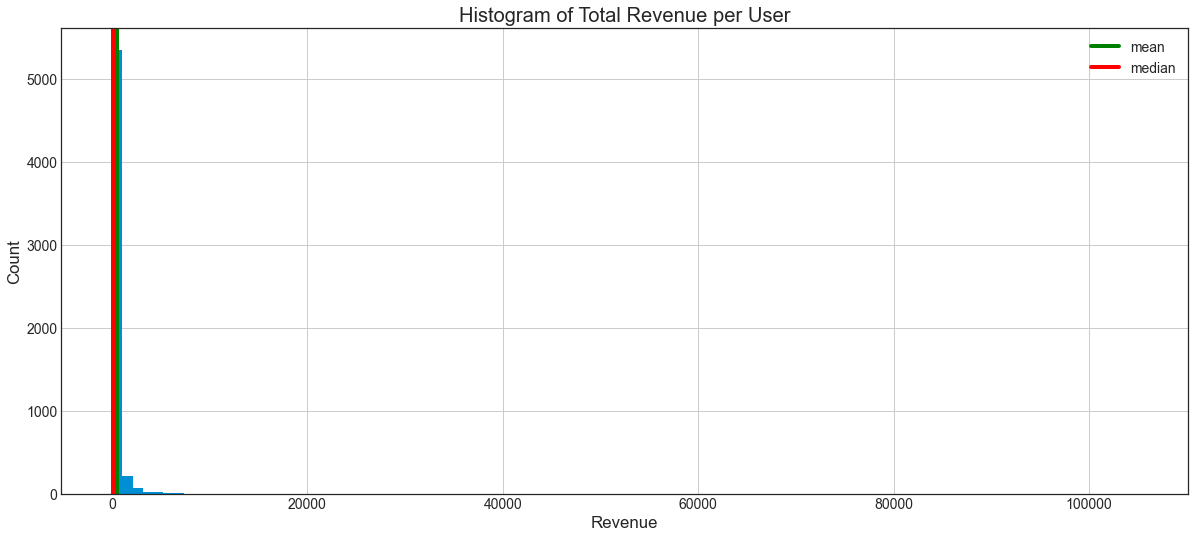

In [46]:
fig,ax = plt.subplots(1,1,figsize=(18,8))
rev_per_user.hist(bins=100,ax=ax); ax.set_title("Histogram of Total Revenue per User"); ax.set_xlabel('Revenue'); ax.set_ylabel('Count')
ax.axvline(rev_per_user.mean(),c='g',label='mean'); ax.axvline(rev_per_user.median(),c='r',label='median'); ax.legend()


This plot on the left uses fixed number of bins to plot the histogram of revenues per user. Due to the presence of some large values of Revenue this means most users fall into the first bin and the plot is not useful for understanding the details of the distribution for most Users.

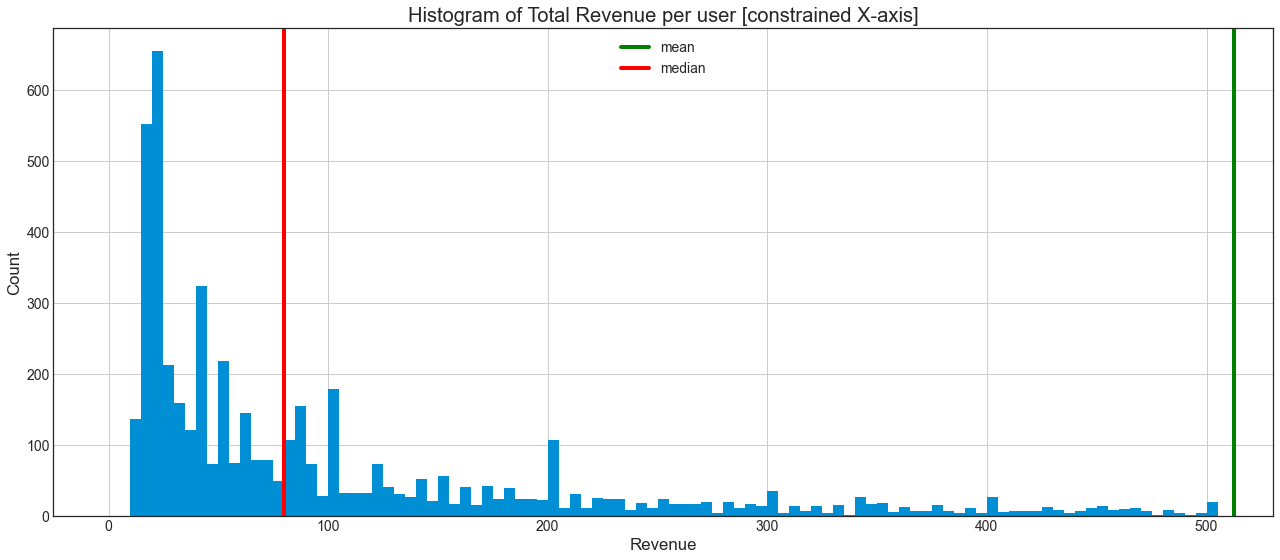

In [47]:
fig,ax = plt.subplots(1,1,figsize=(18,8))
rev_per_user.hist(bins=range(0,510,5),ax=ax); ax.set_title("Histogram of Total Revenue per user [constrained X-axis]"); ax.set_xlabel('Revenue'); ax.set_ylabel('Count');
ax.axvline(rev_per_user.mean(),c='g',label='mean'); ax.axvline(rev_per_user.median(),c='r',label='median'); ax.legend()
plt.tight_layout()

This plots the same data, but set the bins of the histogram to cover the range from zero to around the mean value to allow more details to be observed for typical users.

## Question 5

What is the average week 1 revenue, ie the revenue generated by the user in their first week (ie within the first 7 days since registration)?

So within 7 days = days_since_reg is 0 - 6

In [57]:
df[df.days_since_reg < 7].groupby('UserId').Revenue.sum().agg([pd.Series.mean, pd.Series.median])

mean      189.485308
median     50.000000
Name: Revenue, dtype: float64